## Import the dependancies

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Data Collection 

In [6]:

wine_dataset = pd.read_csv('winequality-red.csv', sep=';')

In [7]:
wine_dataset.shape

(1599, 12)

In [9]:
wine_dataset.head(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [10]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Analysis and Visualization

In [14]:
wine_dataset['quality'].value_countsnts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
#statistical Measures
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


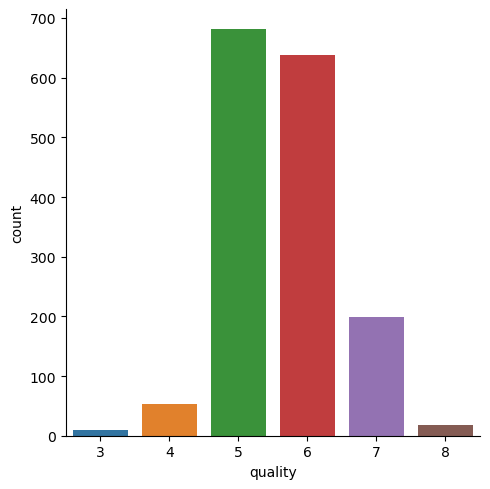

In [15]:
# number of wine for each quality
sns.catplot(x = 'quality', data=wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

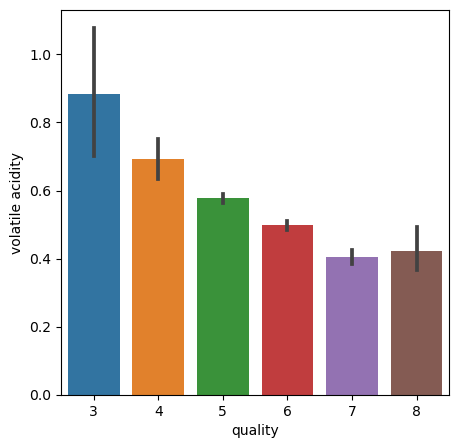

In [16]:
# volatile acidity and quality plot
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data =wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

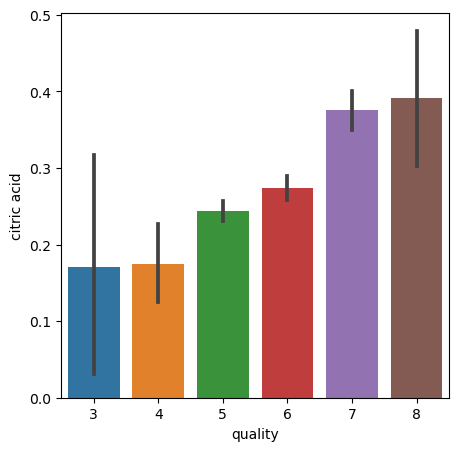

In [17]:
# citric acid and quality plot
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data =wine_dataset)

<Axes: xlabel='quality', ylabel='residual sugar'>

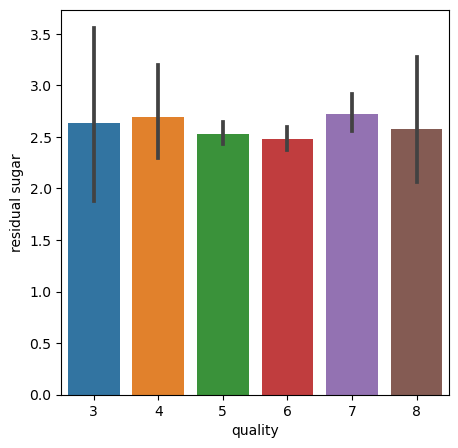

In [18]:
# residual sugar and quality plot
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'residual sugar', data =wine_dataset)

In [19]:
# Correlation between the all the column and quality
# positive correlation and negative correlation
correlation = wine_dataset.corr()

<Axes: >

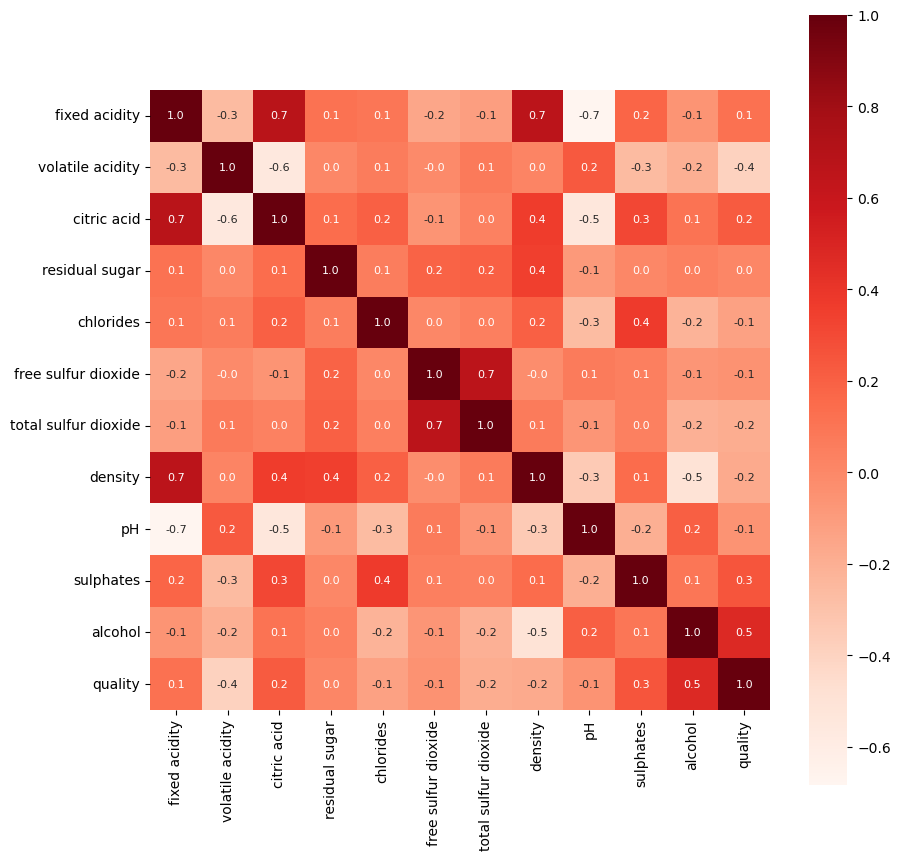

In [23]:
# Constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation , cbar=True, square = True, fmt='.1f', annot = True, annot_kws ={'size':8}, cmap ='Reds')
#cbar: colour bar
#fmt: number of value wanted after decimal value
#annot: label for each feature
#annot_kws: size for the label
#cmap: color for the heatmap

## Data Preprocessing

In [27]:
X=wine_dataset.drop('quality',axis=1)


In [29]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

### Label Binarization
reduce the 6 different values(3,4,5,6,7,8) of quality to 2 values to 1(good:7,8) and 0(bad:3,4,5,6)


In [30]:
Y=wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [31]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


## Split into train and test data

In [40]:

X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

In [41]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(1599, 11) (1279, 11) (320, 11)
(1599,) (1279,) (320,)


## Model training

Random Forest Classifier: It is basically Mulitple decision tree model



In [43]:
model = RandomForestClassifier()

In [44]:
model.fit(X_train, Y_train)

RandomForestClassifier()

## Model Evaluation

In [46]:
# Trained data accurarcy 
trained_data_predict = model.predict(X_train)
trained_data_accuracy = accuracy_score(trained_data_predict,Y_train)
print("Accuracy score for trained data: ", trained_data_accuracy)

Accuracy score for trained data:  1.0


In [47]:
# Test data accurarcy 
test_data_predict = model.predict(X_test)
test_data_accuracy = accuracy_score(test_data_predict,Y_test)
print("Accuracy score for test data: ", test_data_accuracy)

Accuracy score for test data:  0.925


## Building a predictive system

In [53]:
#wine_data = (7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)
wine_data =(7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
#change to numpy array
wine_data_numpy = np.asarray(wine_data)

# reshape the data as we are predicting for only one data otherwise machine will look for big data
wine_data_reshape = wine_data_numpy.reshape(1,-1)

prediction_wine = model.predict(wine_data_reshape)
print(prediction_wine)

if prediction_wine[0]==1:
    print("Wine is of Good Quality")
else:
    print("Wine is of Bad Quality")

[1]
Wine is of Good Quality


C:\Users\subit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
